In [1]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import tensorflow_datasets as tfds
import keras
import re
import tarfile
from matplotlib import pyplot as plt
import csv
import io
import os
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer

# Exercice 1: Reccurent neuronal network: IMBD sentiment classification

## Our goal here will be to be able to predict if a comment is positive or negative based only on the text comment

### First, we importe all the needed libraries

### We preview the dataset

In [14]:
url = https://public.bitmex.com/?prefix=data/
    
data = pd.read_csv('IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [15]:
english_stops = set(stopwords.words('english'))
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Load and Clean Dataset

since we do not 

### Encode Sentiments

In [16]:
def load_dataset():
    df = pd.read_csv('IMDB Dataset.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


### Split data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print('Train Set')
print(x_train, '\n')
print(y_train, '\n')
print('Test Set')
print(x_test, '\n')
print(y_test)

Train Set
9382     [it, begins, series, thefts, seemingly, unrela...
28677    [if, like, films, school, bullies, brave, chil...
40564    [spacecamp, favorite, movie, it, great, story,...
24582    [actually, i, still, doubt, anything, movie, i...
38675    [well, nice, surprise, trailer, predict, good,...
                               ...                        
27723    [i, deeply, disturbed, posts, i, reading, mess...
42312    [there, many, new, styles, sitcom, one, works,...
31046    [i, imagine, young, people, involved, making, ...
1566     [had, ned, kelly, born, later, probably, would...
49617    [if, tired, repetitive, unintelligent, materia...
Name: review, Length: 40000, dtype: object 

9382     1
28677    1
40564    1
24582    0
38675    1
        ..
27723    0
42312    1
31046    0
1566     1
49617    1
Name: sentiment, Length: 40000, dtype: int64 

Test Set
4877     [as, many, today, movies, guilty, plot, exactl...
37358    [when, employees, theater, find, old, reel, fi...
5

In [18]:
#function for getting the maximum review length
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

### Tokenize and Pad/Truncate Reviews

In [19]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[    7   734   107 ...     0     0     0]
 [   55     6    35 ...    72   137   121]
 [22766   416     3 ...   212  2856   102]
 ...
 [    1   724    96 ...     0     0     0]
 [ 3021  3581  1395 ...  3322  8473   144]
 [   55  1340  3391 ...     0     0     0]] 

Encoded X Test
 [[ 108   37  398 ...  216  583    7]
 [ 172 7203  638 ...    0    0    0]
 [   8   44 1967 ...    0    0    0]
 ...
 [   8  333    3 ... 1935  324 1101]
 [   8    3  117 ...    0    0    0]
 [ 283  322   13 ... 1120 7926  666]] 

Maximum review length:  130


### Build Architecture/Model

In [20]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 130, 32)           2959232   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,984,129
Trainable params: 2,984,129
Non-trainable params: 0
_________________________________________________________________
None


### Training

In [ ]:
checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)
model.fit(x_train, y_train, batch_size = 128, epochs = 5, callbacks=[checkpoint])

Epoch 1/5
313/313 [==============================] - 26s 78ms/step - loss: 0.5809 - accuracy: 0.6376

Epoch 00001: accuracy improved from -inf to 0.76395, saving model to models\LSTM.h5
Epoch 2/5
313/313 [==============================] - 25s 79ms/step - loss: 0.1968 - accuracy: 0.9329

Epoch 00002: accuracy improved from 0.76395 to 0.92862, saving model to models\LSTM.h5
Epoch 3/5
221/313 [====================>.........] - ETA: 7s - loss: 0.1118 - accuracy: 0.9658

### Testing

In [ ]:
y_pred = model.predict_classes(x_test, batch_size = 128)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

### Load Saved Model

In [66]:
loaded_model = load_model('models/LSTM.h5')
review = str(input('Movie Review: '))

Movie Review: This is not a good movie.


In [67]:
# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)

Cleaned:  This is not a good movie
Filtered:  ['this good movie']


In [68]:
tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)

[[8 9 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### Predict the sentiment of short textual comments about movies

In [69]:
result = loaded_model.predict(tokenize_words)
print(result)

[[0.7746602]]


In [70]:
if result >= 0.7:
    print('positive')
else:
    print('negative')

positive


# Exercice 2: Text Classification: the Ohsumed dataset

## For this second exercice we are going to realize a text classifier using deep neural networks

### To beginning, we are going to only use the dataset that contains 20 000 articles

#### a) Recuperation of the datas

In [219]:
## Parse your data
def get_info(path: str):
    data = list(os.walk(path))[1:]
    files = []
    categories = []
    textes = []
    for d in data:
        folder_name = d[0]
        for file in d[2]:
            s = folder_name.split('/')[-1].split("\\")[1]
            categories.append(s) # the tags of our model
            files.append((folder_name.split('/')[-1], os.path.join(folder_name, file)))

    d = defaultdict(int)
    texts = defaultdict(list)
    for (cate, file) in files:
        with open(file, 'r') as outfile:
            text = outfile.read()
            texts[cate].append(text)
            textes.append(text)
            words = text_to_word_sequence(text)
            for word in words:
                d[word] += 1
    data = pd.DataFrame(data={'Categories' : categories, 'Textes' : textes}) # a dataFrame with the categorie corresponding to its text description
    words = sorted(d.items(), key=lambda x: x[1], reverse=True)
    return (data, words)

In [220]:
# First we import the dataset of 20 000
cwd = os.getcwd()
data_dir_training = cwd + "/ohsumed-first-20000-docs/training"
data_dir_test = cwd + "/ohsumed-first-20000-docs/test"
data_train, words = get_info(data_dir_training)
data_test, words_train = get_info(data_dir_test)
print(len(data_train))

10433


#### b) Some small basic statistic and analysis of our data

#### c) Preprocessinf of the data

In [221]:
english_stops = set(stopwords.words('english'))
print(english_stops)

{'than', 't', "shan't", 'his', "haven't", 'during', 'myself', 'how', 'before', "you'd", 'after', "you're", "don't", 'y', 'is', 'yourself', 'they', 'he', 'those', 'can', 've', 'all', 'she', 'was', "mightn't", 'both', "won't", 'from', "isn't", 'but', 'because', 'each', 'wouldn', 'only', 'what', 'as', 'whom', 'not', 'until', 'have', 'ma', 'do', 'where', 'of', 'hadn', 'and', 'himself', 'does', 'these', "should've", 'them', 'under', 'isn', 'm', 'this', 'has', 'haven', 'yourselves', 'won', 's', 'to', 'me', "it's", 'who', 'doing', 'needn', 'couldn', 'i', 'itself', 'between', 'out', 'when', 'be', "you've", 'about', 'nor', 'am', 'very', "hadn't", "wasn't", 'for', 'having', 'o', 'or', 're', 'in', 'don', 'mustn', 'shan', 'up', 'too', "wouldn't", 'mightn', 'been', 'at', 'shouldn', 'will', "mustn't", 'an', 'again', "you'll", "doesn't", 'we', 'above', 'some', 'most', 'hers', 'your', 'ain', 'ourselves', 'why', 'my', 'didn', 'the', 'off', 'any', 'here', 'theirs', 'on', 'were', 'aren', 'are', 'by', "ha

In [222]:

token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
word_index=token.word_index
def clean_dataset(df):
    x_data = df['Textes']    
    y_data = df['Categories']

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words and the 100 more frequent words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 to 22
    y_data = y_data.replace('C01', 0)
    y_data = y_data.replace('C02', 1)
    y_data = y_data.replace('C03', 2)
    y_data = y_data.replace('C04', 3)
    y_data = y_data.replace('C05', 4)
    y_data = y_data.replace('C06', 6)
    y_data = y_data.replace('C07', 6)
    y_data = y_data.replace('C08', 7)
    y_data = y_data.replace('C09', 8)
    y_data = y_data.replace('C10', 9)
    y_data = y_data.replace('C11', 10)
    y_data = y_data.replace('C12', 11)
    y_data = y_data.replace('C13', 12)
    y_data = y_data.replace('C14', 13)
    y_data = y_data.replace('C15', 14)
    y_data = y_data.replace('C16', 15)
    y_data = y_data.replace('C17', 16)
    y_data = y_data.replace('C18', 17)
    y_data = y_data.replace('C19', 18)
    y_data = y_data.replace('C20', 19)
    y_data = y_data.replace('C21', 20)
    y_data = y_data.replace('C22', 21)
    y_data = y_data.replace('C23', 22)

    return x_data, y_data

x_data, y_data = clean_dataset(data_train)

print('text')
print(x_data, '\n')
print('type')
print(y_data)

text
0        [augmentation, mentoplasty, using, mersilene, ...
1        [multiple, intracranial, mucoceles, associated...
2        [replacement, aortic, valve, cusp, neonatal, e...
3        [the, value, indium, leukocyte, scanning, eval...
4        [febrile, infants, less, eight, weeks, old, pr...
                               ...                        
10428    [afferent, nipple, valve, malfunction, caused,...
10429    [extracorporeal, shock, wave, lithotripsy, com...
10430    [tamm, horsfall, autoantibodies, interstitial,...
10431    [results, contemporary, radical, cystectomy, i...
10432    [total, bladder, replacement, using, detubular...
Name: Textes, Length: 10433, dtype: object 

type
0         0
1         0
2         0
3         0
4         0
         ..
10428    22
10429    22
10430    22
10431    22
10432    22
Name: Categories, Length: 10433, dtype: int64


In [223]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, )

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

Train Set
5465    [assessment, major, venous, anomalies, compute...
7020    [low, dose, lovastatin, safely, lowers, choles...
6893    [skin, manifestations, congenital, deficiency,...
2918    [hypothyroidism, pleural, effusions, serous, e...
8105    [treatment, moderate, severe, hypothermia, urb...
                              ...                        
5377    [surgical, repair, postinfarction, ventricular...
2120    [a, small, animal, model, human, helicobacter,...
20      [mechanical, cardiopulmonary, support, refract...
9059    [macrophages, susceptible, targets, hiv, infec...
8387    [willingness, health, professions, students, t...
Name: Textes, Length: 8346, dtype: object 

2436     [esophageal, reflux, isolated, myotomy, achala...
2317     [corticosteroid, treatment, reduces, mast, cel...
9822     [bilateral, phrenic, nerve, palsy, associated,...
2394     [obstructing, carcinoma, cecum, carcinoma, cec...
7043     [anti, islet, cell, antibodies, nod, mice, we,...
             

In [224]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [225]:
from tensorflow.keras.layers import Flatten, Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout


In [226]:
y_train

5465    13
7020    17
6893    17
2918     7
8105    20
        ..
5377    13
2120     6
20       0
9059    22
8387    20
Name: Categories, Length: 8346, dtype: int64

In [227]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[  417   205   493 ...     0     0     0]
 [  112   141  3809 ...    13    14   139]
 [  175   752   468 ...     0     0     0]
 ...
 [  943  1070   448 ...    61    82   367]
 [  882  1577  4839 ...   694 13739  4221]
 [17603   375 12350 ...     0     0     0]] 

Encoded X Test
 [[  582  1211   416 ...     0     0     0]
 [ 2571     8  2122 ...     5 16792  5015]
 [  733 19707   384 ...     0     0     0]
 ...
 [   17  1370 13994 ...     0     0     0]
 [ 7317   949  4730 ...     0     0     0]
 [ 2166  4843   617 ...     0     0     0]] 

Maximum review length:  112


In [228]:
x_train.shape

(8346, 112)

#### e) Creation of our model

In [258]:
from tensorflow.keras.layers import Flatten, Dense, Embedding, Conv1D, GlobalMaxPooling1D, SpatialDropout1D
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
#model.add(layers.Dropout(0.5))
model.add(Dense(23, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 112, 32)           853184    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 112, 32)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_82 (Dense)             (None, 23)                2967      
Total params: 938,583
Trainable params: 938,583
Non-trainable params: 0
_________________________________________________________________
None


In [259]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data = (x_test, y_test), validation_split = 0.1, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)],verbose = 1)

Epoch 1/10
59/59 [==============================] - 18s 266ms/step - loss: 2.9513 - accuracy: 0.1578 - val_loss: 2.8157 - val_accuracy: 0.1641
Epoch 2/10
59/59 [==============================] - 16s 267ms/step - loss: 2.7694 - accuracy: 0.1760 - val_loss: 2.8011 - val_accuracy: 0.1641
Epoch 3/10
59/59 [==============================] - 16s 266ms/step - loss: 2.7547 - accuracy: 0.1847 - val_loss: 2.7919 - val_accuracy: 0.1737
Epoch 4/10
59/59 [==============================] - 16s 265ms/step - loss: 2.7363 - accuracy: 0.1946 - val_loss: 2.7882 - val_accuracy: 0.1593
Epoch 5/10
59/59 [==============================] - 16s 267ms/step - loss: 2.7049 - accuracy: 0.1974 - val_loss: 2.7824 - val_accuracy: 0.1665
Epoch 6/10
59/59 [==============================] - 16s 264ms/step - loss: 2.6742 - accuracy: 0.2125 - val_loss: 2.8326 - val_accuracy: 0.1317
Epoch 7/10
59/59 [==============================] - 16s 269ms/step - loss: 2.5854 - accuracy: 0.2252 - val_loss: 2.6524 - val_accuracy: 0.1928

In [260]:
y_pred = model.predict_classes(x_test, batch_size = 128)
zero = 0

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1
    if 1 != y_pred[i]:
            zero += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))
print('Diff zero: {}'.format(zero))

Correct Prediction: 521
Wrong Prediction: 1566
Accuracy: 24.96406324868232
Diff zero: 2087


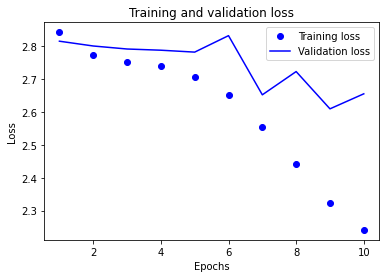

In [261]:
# Training and validation loss
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


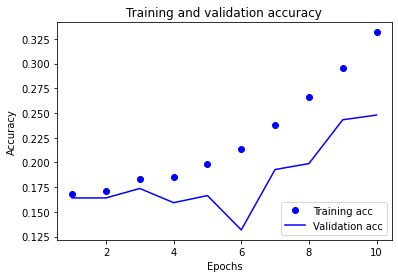

In [262]:
# Training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### With the full data set

In [247]:
# First we import the dataset of the global data
cwd = os.getcwd()
data_dir = cwd + "/ohsumed-all"
data, words = get_info(data_dir)